## Computational Challenge 7

Group \#2

Students: Daniel Ajuzie, Mohammad Daneshvar, Saul Acevedo, and Alan Akil

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart

$\textbf{Challenge:}$

In this challenge you will examine the behavior of the Wright Fisher and Moran process at
different population sizes.

The haploid Moran model with a single locus and two alleles $a$ and $A$ has transition probabilities:

$$
T(n+1|n) = (1-u) \frac{w_a i}{w_a i + (N-i)w_A}(n/N)(1-n/N)
+ v \frac{w_A (N-i)}{w_a i + (N-i)w_A}(1-n/N)^2
$$

$$
T(n-1|n) = (1-v) \frac{w_A (N-i)}{w_a i + (N-i)w_A}(n/N)(1-n/N)
+ u \frac{w_a i}{w_a i + (N-i)w_A}(n/N)^2
$$

(a) Setting $w_a=1+s$ and $w_A=1$, find the stationary distribution of the haploid Moran model at population sizes of $N=10,10^2,10^3,10^4$. You should work with the other groups and choose approprite values of $u$, $v$, and $s$. Choose them so that the values of $Nu$, $Nv$, and $Ns$ are the same for each population size. Compare the stationary distribution produced via simulation to that given in the lectures as the solution to the Fokker Planck equation: $P^* = x^{Nv-1}(1-x)^{Nu-1}e^{Nsx}$.

(b) Now set the mutation rates $u=v=0$. Beginning with a single copy of allele $a$, i.e. $i=1$ and use the simulation to estimate the probability of fixation of $a$ for the same population sized and values of $s$ used before. Compare the results to the analytic expression derived for the Moran model $f_1=\frac{w_A/w_a-1}{(w_A/w_a)^N-1}$ and to the approximation commonly quoted for the Wright-Fisher model $f_1=(1-e^{-s})/(1-e^{-Ns})$.

(c) In both cases explain any differences between simulated and analytical results.

In [3]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
from numba import njit, prange
import time
from scipy.integrate import solve_ivp
import time

## Define the function for simulating Case 1 and 2

In [7]:
class MoranProcess:
    """
    Moran model for alleges a or A with mutation and death. No selection.
    """
#     @jit
    def __init__(self, num_a,mu_a,mu_A,N,w_a,w_A,u,v,num_time_steps, seed=None):

        if seed is not None:
            np.random.seed(seed)

        self.num_a = num_a
        self.num_A = N - num_a
        self.mu_a = mu_a
        self.mu_A = mu_A
        self.N = N
        self.w_a = w_a
        self.w_A = w_A
        self.u = u
        self.v = v
        
        
        self.history = [(self.num_a, self.num_A)]
#     @jit
    def step(self):
        """
        Select a or A for birth.
        Select a or A for death.

        Update history and states.
        """
        ## Birth and death process
        probability_plusone_a = (1-self.u)*(self.w_a*self.num_a)/(w_a*self.num_a+(self.N-self.num_a)*self.w_A)*(self.num_a/self.N)*(1-self.num_a/self.N) + self.v * (self.w_A*self.num_A)/(w_a*self.num_a+(self.N-self.num_a)*self.w_A)*(1-self.num_a/self.N)**2
        probability_minusone_a = (1-self.v)*(self.w_A*self.num_A)/(w_a*self.num_a+(self.N-self.num_a)*self.w_A)*(self.num_a/self.N)*(1-self.num_a/self.N) + self.u * (self.w_a*self.num_a)/(w_a*self.num_a+(self.N-self.num_a)*self.w_A)*(self.num_a/self.N)**2
        probability_same_a =  1 - probability_plusone_a - probability_minusone_a
        
        U = np.random.uniform(0,1)
        
        
        if U < probability_plusone_a:
            # Birth of a and death of A.
            self.num_a += 1 # birth of a
            self.num_A -= 1 # death of A
        elif U > probability_plusone_a and U < probability_plusone_a + probability_minusone_a:
            # Birth of A and death of a.
            self.num_A += 1 # birth of A
            self.num_a -= 1 # death of a

        self.history.append((self.num_a, self.num_A))
#     @jit
    def simulate(self):
        """
        Run the entire simulation: repeatedly step through
        until the number of hawks is either 0 or 3.
        """
        for i in range(num_time_steps):
            self.step()
        return self.history

0.0


/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


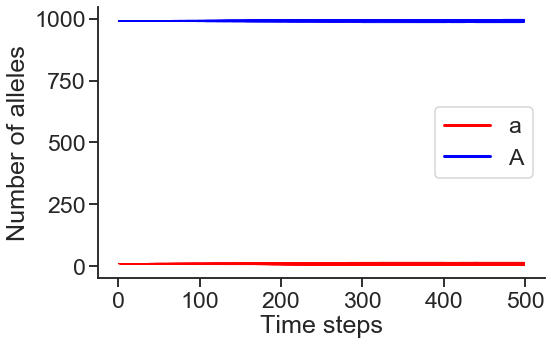

Simulation time: 19.75167202949524 sec
Number of realizations = 10000
Probability of fixation of allele a: 0.0


In [97]:
num_realizations = 1* 10 ** 4
path_lengths = []
paths=[]
num_time_steps = 5 * 10 ** 2 -1 

N = 10 ** 3
X_0= 10
num_a = X_0
mu_a=0
mu_A=0
s = -0.003
u = .005
v = .005
w_a = 1 + s
w_A = 1

start_time = time.time() # start timing
for seed in range(num_realizations):
    mp = MoranProcess(num_a,mu_a,mu_A,N,w_a,w_A,u,v,num_time_steps,seed)
    paths.append(mp.simulate()) # save each realization
    if seed%num_realizations==0:
        print(seed/num_realizations)

stop_time = time.time() # start timing


paths = np.array(paths).squeeze()
final_state = paths[:,-1,0]

# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

for i in range(num_realizations//2):
    plt.plot(paths[i,:,0],linewidth=0.1,color='red')
    plt.plot(paths[i,:,1],linewidth=0.1,color='blue')

plt.plot(paths[0,:,0],linewidth=0.1,color='red',label='a')
plt.plot(paths[0,:,1],linewidth=0.1,color='blue',label='A')   

plt.xlabel('Time steps')
plt.ylabel('Number of alleles')

leg = plt.legend()
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

sns.despine()
plt.show()

probability_reaching_abs_state = 1 - np.count_nonzero(N-paths[:,-1,0])/num_realizations
print('Simulation time:',stop_time-start_time,'sec')
print('Number of realizations =',num_realizations)
print('Probability of fixation of allele a:',probability_reaching_abs_state)


(a) Compare the stationary distribution produced via simulation to that given in the lectures as the solution to the Fokker Planck equation: $P^* = x^{Nv-1}(1-x)^{Nu-1}e^{Nsx}$.

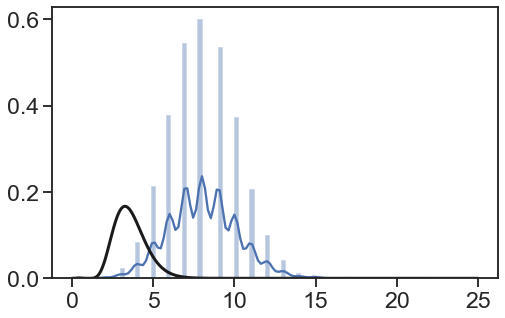

In [101]:
# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

sns.distplot(paths[:,-1,0])

x=np.linspace(0,25,10**4) # x = n/N
P_star = x**(N*v-1) * (1-x)**(N*u-1) * np.exp(N*s*x)

plt.plot(x,P_star,color='k',linewidth=3)

plt.show()

(b) Now set the mutation rates $u=v=0$. Beginning with a single copy of allele $a$, i.e. $i=1$ and use the simulation to estimate the probability of fixation of $a$ for the same population sized and values of $s$ used before. Compare the results to the analytic expression derived for the Moran model $f_1=\frac{w_A/w_a-1}{(w_A/w_a)^N-1}$ and to the approximation commonly quoted for the Wright-Fisher model $f_1=(1-e^{-s})/(1-e^{-Ns})$.

0.0


/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


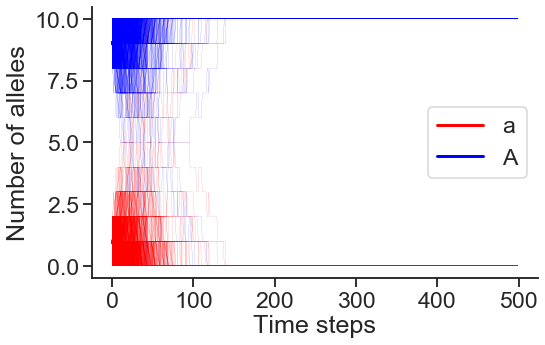

Simulation time: 29.222418069839478 sec
Number of realizations = 10000
Probability of fixation of allele a: 0.0022999999999999687
Theory: 0.09865339623553747


In [102]:
num_realizations = 1* 10 ** 4
path_lengths = []
paths=[]
num_time_steps = 2 * 10 ** 2 -1 

N = 10 ** 1
X_0= 1
num_a = X_0
mu_a=0
mu_A=0
s = -0.003
u = 0
v = 0
w_a = 1 + s
w_A = 1

start_time = time.time() # start timing
for seed in range(num_realizations):
    mp = MoranProcess(num_a,mu_a,mu_A,N,w_a,w_A,u,v,num_time_steps,seed)
    paths.append(mp.simulate()) # save each realization
    if seed%num_realizations==0:
        print(seed/num_realizations)

stop_time = time.time() # start timing


paths = np.array(paths).squeeze()
final_state = paths[:,-1,0]

# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

for i in range(num_realizations//2):
    plt.plot(paths[i,:,0],linewidth=0.1,color='red')
    plt.plot(paths[i,:,1],linewidth=0.1,color='blue')

plt.plot(paths[0,:,0],linewidth=0.1,color='red',label='a')
plt.plot(paths[0,:,1],linewidth=0.1,color='blue',label='A')   

plt.xlabel('Time steps')
plt.ylabel('Number of alleles')

leg = plt.legend()
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

sns.despine()
plt.show()

# probability_reaching_abs_state = 1 - np.count_nonzero(N-final_state)/num_realizations

probability_reaching_abs_state = 1 - np.count_nonzero(N-paths[:,-1,0])/num_realizations
print('Simulation time:',stop_time-start_time,'sec')
print('Number of realizations =',num_realizations)
print('Probability of fixation of allele a:',probability_reaching_abs_state)
f_1 = (w_A/w_a-1) / ((w_A/w_a)**N-1)
print('Theory:',f_1)

# Plot a sample trajectory of membrane potential